# Cloning the repository

In [13]:
!git clone https://github.com/saaresearch/ODRS.git
%cd ODRS/

Cloning into 'ODRS'...
remote: Enumerating objects: 2766, done.
remote: Counting objects: 100% (861/861), done.
remote: Compressing objects: 100% (460/460), done.
remote: Total 2766 (delta 358), reused 774 (delta 331), pack-reused 1905
Receiving objects: 100% (2766/2766), 198.22 MiB | 13.50 MiB/s, done.
Resolving deltas: 100% (1227/1227), done.
/content/ODRS


# Installing dependencies

In [3]:
!pip install -r requirements.txt

In [14]:
%cd ..
# %cd /content/

/content


# Download dataset

[Link to data and code on Kaggle](https://www.kaggle.com/datasets/parohod/warp-waste-recycling-plant-dataset?select=Warp-D)

In [ ]:
!git clone https://github.com/AIRI-Institute/WaRP

Cloning into 'WaRP'...
remote: Enumerating objects: 16721, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 16721 (delta 28), reused 0 (delta 0), pack-reused 16676
Receiving objects: 100% (16721/16721), 794.77 MiB | 13.52 MiB/s, done.
Resolving deltas: 100% (110/110), done.
Updating files: 100% (16898/16898), done.


## Image Example

![WaRP-Categories.png](../docs/img/WaRP-Categories.png)

## Structure

![WaRP-Dataset](../docs/img/WaRP-Dataset.png)

To use the recommendation system or train the desired detector, put your dataset in yolo format in the ***user_datasets*** directory. The set can have the following structures:
```markdown
user_datasets
|_ _ <folder_name_your_dataset>
    |_ _train
        |_ _images
                |_ <name_1>.jpg
                |_ ...
                |_ <name_N>.jpg
        |_ _labels
                |_ <name_1>.txt
                |_ ...
                |_ <name_N>.txt
    |_ _valid
        |_ _images
                |_ <name_1>.jpg
                |_ ...
                |_ <name_N>.jpg
        |_ _labels
                |_ <name_1>.txt
                |_ ...
                |_ <name_N>.txt
    |_ _test
        |_ _images
                |_ <name_1>.jpg
                |_ ...
                |_ <name_N>.jpg
        |_ _labels
                |_ <name_1>.txt
                |_ ...
                |_ <name_N>.txt

```
***or you can use the following structure, then your set will be automatically divided into samples:***

```markdown
user_datasets
|_ _ <folder_name_your_dataset>
        |_ <name_1>.jpg
        |_ ...
        |_ <name_N>.jpg
        |_ ...
        |_ <name_1>.txt
        |_ ...
        |_ <name_N>.txt

```


In [15]:
!cp WaRP/Warp-D/classes.txt ./ODRS/

In [18]:
!mkdir WaRP/Warp-D/valid
!cp -r WaRP/Warp-D/test/* WaRP/Warp-D/valid/

# ML Recommendation System

2024-06-24 12:02:57.199 | INFO     | src.data_processing.data_utils.utils:get_data_path:74 - Copying a set of images to /content/ODRS/user_datasets
2024-06-24 12:03:00.249 | INFO     | src.data_processing.data_utils.split_dataset:split_data:35 - Dataset is ready
Annotation analyze: 100%|██████████| 3496/3496 [00:00<00:00, 20383.28it/s]
2024-06-24 12:27:55.369 | INFO     | ODRS.src.ML.run_recommender:predict:64 - Top models for training:
2024-06-24 12:27:55.372 | INFO     | ODRS.src.ML.run_recommender:predict:66 - 1) yolov7x
2024-06-24 12:27:55.374 | INFO     | ODRS.src.ML.run_recommender:predict:66 - 2) yolov8x6
2024-06-24 12:27:55.375 | INFO     | ODRS.src.ML.run_recommender:predict:66 - 3) yolov7


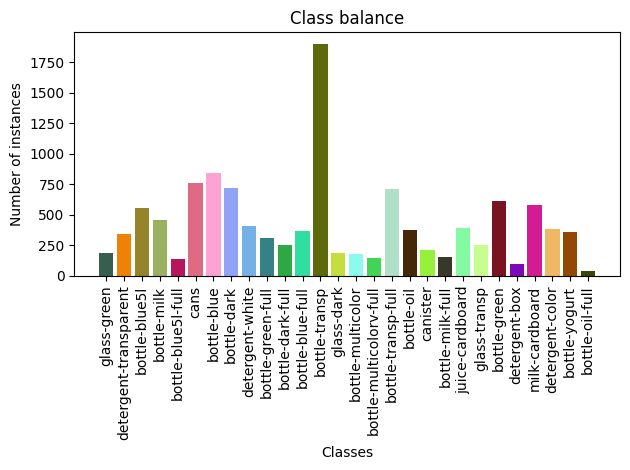

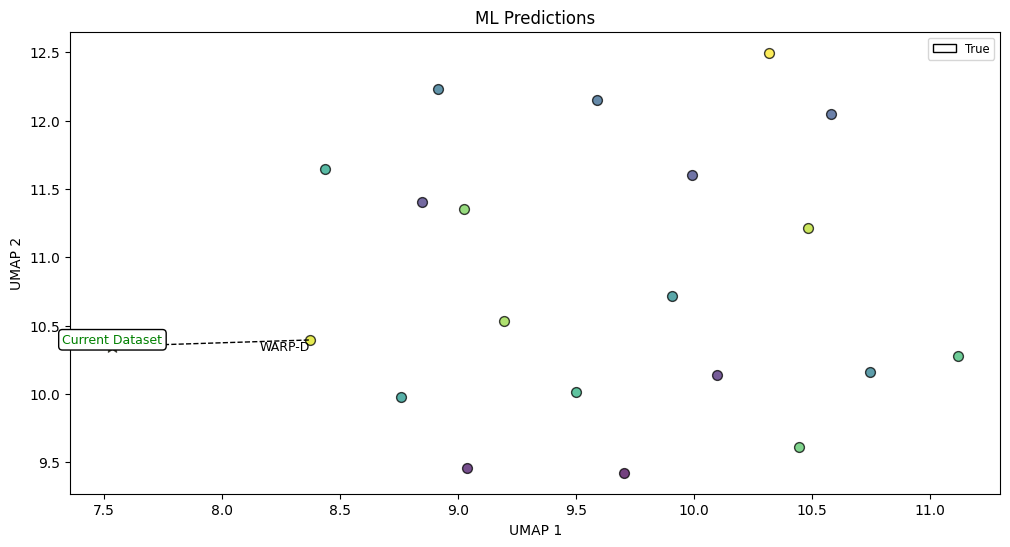

In [19]:
from ODRS.src.api.ODRS import ODRS

odrs = ODRS(job="ml_recommend", data_path='/content/WaRP/Warp-D', classes="classes.txt",
              gpu=True, accuracy=True, speed=False, balance=False)
odrs.fit()

# Model traning

In [1]:
from ODRS.src.api.ODRS import ODRS

odrs = ODRS(job="object_detection", data_path='Warp-D', classes="classes.txt", img_size = 300,
              batch_size = 20, epochs = 1, model = 'yolov8n', split_train_value = 0.85, split_val_value = 0.1,
              gpu_count = 1, select_gpu = 0)

odrs.fit()


2024-06-24 14:33:19.401 | INFO     | src.data_processing.data_utils.split_dataset:split_data:35 - Dataset is ready
2024-06-24 14:33:19.414 | INFO     | src.data_processing.train_processing.prepare_train:create_config_data:153 - Create config file



from  n    params  module                                       arguments
0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]
1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]
2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]
3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]
4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]
5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]
6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]
7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]
8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]
9                  -1  1    164608  ultraly